# Data Analysis Project

### By Rami Abdulmalik & Yaser Alkhayyat

[View Dataset](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024?select=linkedin_job_postings.csv)

In [1]:
# import important libraries
import pandas as pd
import seaborn as sns

# 1 - Data Loading and Initial Exploration:
- Load the selected dataset into your preferred data analysis environment.
- Explore the structure of the dataset (number of rows and columns, data types, etc.).
- Examine the first few rows of the dataset to understand its contents.


We start by loading a sample from the original dataset as our dataframe due to large size problems, then save that sample in a csv file.

This process is done only once and is provided just for preview purposes.

In [2]:
# # loading the dataset
# df = pd.read_csv('./data/linkedin_job_postings.csv').sample(250_000)
# df.to_csv('./data/linkedin_job_postings_minimized.csv')

Reading the dataset using `pd.read_csv()`

In [3]:
df = pd.read_csv('./data/linkedin_job_postings_minimized.csv')

We can collect some information about the dataset columns and data types using `df.head()` and `df.info()`

In [4]:
df.head()

,Unnamed: 0,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,1254668,https://www.linkedin.com/jobs/view/freshman-ba...,2024-01-21 02:28:28.626152+00,t,t,f,Freshman Basketball Coach,Bridgeport Public Schools,"Bridgeport, CT",2024-01-14,Stamford,United States,Head Coach,Mid senior,Onsite
1,602796,https://www.linkedin.com/jobs/view/engineering...,2024-01-19 09:45:09.215838+00,t,t,f,ENGINEERING TECHNICIAN 4 - Construction,State of Nevada Division of Human Resource Man...,"Henderson, NV",2024-01-13,Las Vegas,United States,Documentation Engineer,Associate,Onsite
2,859601,https://www.linkedin.com/jobs/view/monitoring-...,2024-01-19 09:45:09.215838+00,f,f,f,"Monitoring Systems Engineer, Senior with Secur...",ClearanceJobs,"San Diego, CA",2024-01-17,Chula Vista,United States,Tool Grinder Ii,Mid senior,Onsite
3,1172581,https://ca.linkedin.com/jobs/view/senior-instr...,2024-01-20 13:23:47.582763+00,t,t,f,"Senior Instrumentation & Controls Engineer, Water",Stantec,"Kelowna, British Columbia, Canada",2024-01-14,Kelowna,Canada,Controls Designer,Mid senior,Onsite
4,36688,https://www.linkedin.com/jobs/view/academic-pr...,2024-01-19 12:29:39.707367+00,t,t,f,Academic Professional Track (Non-Tenure): Prof...,Texas A&M University,"College Station, TX",2024-01-14,College Park,United States,Educational Resource Coordinator,Mid senior,Onsite


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           250000 non-null  int64 
 1   job_link             250000 non-null  object
 2   last_processed_time  250000 non-null  object
 3   got_summary          250000 non-null  object
 4   got_ner              250000 non-null  object
 5   is_being_worked      250000 non-null  object
 6   job_title            250000 non-null  object
 7   company              249999 non-null  object
 8   job_location         249996 non-null  object
 9   first_seen           250000 non-null  object
 10  search_city          250000 non-null  object
 11  search_country       250000 non-null  object
 12  search_position      250000 non-null  object
 13  job_level            250000 non-null  object
 14  job_type             250000 non-null  object
dtypes: int64(1), object(14)
memory usa

Data Description :
- `Unnamed: 0` : the original dataset indexing.
- `job_link` : the link of the job post on linkedIn.
- `last_processed_time` : the last time the post was modified by the company.
- `got_summary` : whether the job summary is available or not (t/f).
- `got_ner` : whether NER was performed on the post or not (t/f).
- `is_being_worked` : whether the job is still open for editing and modifying by the company or not (t/f).
- `job_title` : the title of the job.
- `company` : the company offering the job.
- `job_location` : the city/state of the job.
- `first_seen` : time of the first appearance of the job post.
- `search_city` : the city which used to search for each job.
- `search_country` : the country which used to search for each job.
- `search_position` : the position which used to search for each job.
- `job_level` : the rank of the job.
- `job_type` : nature of the job (on site, remote, hyprid).   

# 2 - Data Cleaning:
- Handle missing values appropriately (e.g., imputation, deletion, etc.).
- Check for and handle any duplicate entries.
- Convert categorical variables into the appropriate data type if necessary.

## 2.1 - Drop Columns
Drop unnecessary columns using `df.drop()`

In [6]:
df.drop(columns=['Unnamed: 0', 'got_summary', 'got_ner'],inplace=True)

## 2.2 - Data Types Conversion
Change dates columns data types from object to datetime using `pd.to_datetime()`

In [7]:
df['last_processed_time'] = pd.to_datetime(df['last_processed_time'])
df['first_seen'] = pd.to_datetime(df['first_seen'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   job_link             250000 non-null  object             
 1   last_processed_time  250000 non-null  datetime64[ns, UTC]
 2   is_being_worked      250000 non-null  object             
 3   job_title            250000 non-null  object             
 4   company              249999 non-null  object             
 5   job_location         249996 non-null  object             
 6   first_seen           250000 non-null  datetime64[ns]     
 7   search_city          250000 non-null  object             
 8   search_country       250000 non-null  object             
 9   search_position      250000 non-null  object             
 10  job_level            250000 non-null  object             
 11  job_type             250000 non-null  object             
dtypes:

Also, The column `is_being_worked` should be boolean.

In [8]:
df['is_being_worked'].value_counts()

is_being_worked
f    249730
t       270
Name: count, dtype: int64

Replacing string (object) values with boolean values.

In [9]:
df['is_being_worked'] = df['is_being_worked'].map({'t':True, 'f':False})
df['is_being_worked'].dtype

dtype('bool')

In [10]:
df['is_being_worked'].value_counts()

is_being_worked
False    249730
True        270
Name: count, dtype: int64

## 2.3 - Handle Missing Values
We can see how many null values does each column contain using `df.isnull().sum()`

In [11]:
df.isnull().sum()

job_link               0
last_processed_time    0
is_being_worked        0
job_title              0
company                1
job_location           4
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64

We can notice the following :
- 1 job has null value in `company` column.
- 4 jobs has null values in `job_location` column. 

### 2.3.1 - `Company` Null Values
Show all rows with null value in `company` column.

In [12]:
df[df['company'].isnull()]

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
196857,https://www.linkedin.com/jobs/view/paralegal-a...,2024-01-19 09:45:09.215838+00:00,False,Paralegal Assistant,NaN,"Atlanta, GA",2024-01-13,Atlanta,United States,Clerk General,Associate,Onsite


Best replace for null categorical data is the value with most frequent occurance or **the mode**.\
Using `.value_counts()` , we browse all the companies with the same location and position as the job with the null value in `company`. 

In [13]:
df[(df['job_location']=='Atlanta, GA') & (df['search_position']=='Clerk General')]['company'].value_counts()

company
Stars and Strikes Family Entertainment Centers    1
Crestline Hotels & Resorts                        1
Name: count, dtype: int64

There is no mode for the specified criteria. So, we must delete that row with null value using `df.dropna()`

In [14]:
df = df.dropna(subset=['company'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249999 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   job_link             249999 non-null  object             
 1   last_processed_time  249999 non-null  datetime64[ns, UTC]
 2   is_being_worked      249999 non-null  bool               
 3   job_title            249999 non-null  object             
 4   company              249999 non-null  object             
 5   job_location         249995 non-null  object             
 6   first_seen           249999 non-null  datetime64[ns]     
 7   search_city          249999 non-null  object             
 8   search_country       249999 non-null  object             
 9   search_position      249999 non-null  object             
 10  job_level            249999 non-null  object             
 11  job_type             249999 non-null  object             
dtypes: bool

### 2.3.2 - `job_location` Null Values
Show all rows with null value in `job_location` column.

In [16]:
df[df['job_location'].isnull()]

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
21503,https://www.linkedin.com/jobs/view/research-sc...,2024-01-19 09:45:09.215838+00:00,False,Research Scientist I,Boys Town National Research Hospital,NaN,2024-01-12,Nebraska,United States,Chemist,Mid senior,Onsite
49707,https://www.linkedin.com/jobs/view/travel-rn-c...,2024-01-21 05:44:29.161221+00:00,False,Travel RN - CVPICU,TactStaff,NaN,2024-01-14,West Memphis,United States,Recruiter,Mid senior,Onsite
168488,https://uk.linkedin.com/jobs/view/recruitment-...,2024-01-20 16:30:08.517081+00:00,False,Recruitment Resourcer,Adeline Search,NaN,2024-01-14,Warrington,United Kingdom,Recruiter,Associate,Onsite
208425,https://www.linkedin.com/jobs/view/controls-en...,2024-01-19 09:45:09.215838+00:00,False,Controls Engineer,Gables Search Group,NaN,2024-01-13,New Albany,United States,Controls Designer,Mid senior,Onsite


We browse all jobs offered by the same company as the row with null value in `job_location` column.

In [17]:
boys_company_mask = df['company'] == 'Boys Town National Research Hospital'
tactstaff_mask = df['company'] == 'TactStaff'
adeline_mask = df['company'] == 'Adeline Search'
gables_mask = df['company'] == 'Gables Search Group'

In [18]:
df[boys_company_mask]

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
21503,https://www.linkedin.com/jobs/view/research-sc...,2024-01-19 09:45:09.215838+00:00,False,Research Scientist I,Boys Town National Research Hospital,NaN,2024-01-12,Nebraska,United States,Chemist,Mid senior,Onsite
29115,https://www.linkedin.com/jobs/view/polysomnogr...,2024-01-20 03:03:43.082015+00:00,False,Polysomnographic Technologist (Nights),Boys Town National Research Hospital,"Omaha, NE",2024-01-16,Gretna,United States,Respiratory Therapist,Mid senior,Onsite
85134,https://www.linkedin.com/jobs/view/housekeepin...,2024-01-19 09:45:09.215838+00:00,False,Housekeeping-Hospital - Full Time,Boys Town National Research Hospital,"Omaha, NE",2024-01-13,Nebraska,United States,Housekeeper,Mid senior,Onsite
177347,https://www.linkedin.com/jobs/view/ct-mri-tech...,2024-01-20 07:11:08.540317+00:00,False,CT/ MRI Technologist,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Nebraska,United States,Scanner,Mid senior,Onsite
203941,https://www.linkedin.com/jobs/view/lpn-outpati...,2024-01-20 11:24:22.271385+00:00,False,LPN-Outpatient Child & Adolescent Psychiatry C...,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Gretna,United States,Nurse Licensed Practical,Mid senior,Onsite


All jobs from that company is located at 'Omaha, NE'.\
In other words, 'Omaha, NE' is the **mode** for that criteria.

In [19]:
boys_company_mode = df[boys_company_mask]['job_location'].value_counts().index[0]
df[boys_company_mask] = df[boys_company_mask].fillna(boys_company_mode)
df[boys_company_mask]

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
21503,https://www.linkedin.com/jobs/view/research-sc...,2024-01-19 09:45:09.215838+00:00,False,Research Scientist I,Boys Town National Research Hospital,"Omaha, NE",2024-01-12,Nebraska,United States,Chemist,Mid senior,Onsite
29115,https://www.linkedin.com/jobs/view/polysomnogr...,2024-01-20 03:03:43.082015+00:00,False,Polysomnographic Technologist (Nights),Boys Town National Research Hospital,"Omaha, NE",2024-01-16,Gretna,United States,Respiratory Therapist,Mid senior,Onsite
85134,https://www.linkedin.com/jobs/view/housekeepin...,2024-01-19 09:45:09.215838+00:00,False,Housekeeping-Hospital - Full Time,Boys Town National Research Hospital,"Omaha, NE",2024-01-13,Nebraska,United States,Housekeeper,Mid senior,Onsite
177347,https://www.linkedin.com/jobs/view/ct-mri-tech...,2024-01-20 07:11:08.540317+00:00,False,CT/ MRI Technologist,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Nebraska,United States,Scanner,Mid senior,Onsite
203941,https://www.linkedin.com/jobs/view/lpn-outpati...,2024-01-20 11:24:22.271385+00:00,False,LPN-Outpatient Child & Adolescent Psychiatry C...,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Gretna,United States,Nurse Licensed Practical,Mid senior,Onsite


We repeat the same process for other jobs.

In [20]:
df[tactstaff_mask]['job_location'].value_counts()

job_location
Saratoga Springs, NY    2
Albuquerque, NM         1
Ste. Genevieve, MO      1
Maumelle, AR            1
Auburn, NY              1
Chattanooga, TN         1
Lima, OH                1
Winston-Salem, NC       1
Benson, AZ              1
Manchester, CT          1
Name: count, dtype: int64

In [21]:
tactstaff_mode = df[tactstaff_mask]['job_location'].value_counts().index[0]
df[tactstaff_mask]= df[tactstaff_mask].fillna(tactstaff_mode)
df[tactstaff_mask].head()

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
18409,https://www.linkedin.com/jobs/view/travel-rn-o...,2024-01-20 10:53:32.747142+00:00,False,Travel RN - OR - Operating Room,TactStaff,"Albuquerque, NM",2024-01-14,Albuquerque,United States,Recruiter,Mid senior,Onsite
23146,https://www.linkedin.com/jobs/view/travel-rn-m...,2024-01-20 08:43:27.175406+00:00,False,Travel RN - Med Surg,TactStaff,"Ste. Genevieve, MO",2024-01-14,Kaskaskia,United States,Recruiter,Mid senior,Onsite
35655,https://www.linkedin.com/jobs/view/travel-rn-b...,2024-01-19 09:45:09.215838+00:00,False,Travel RN - Behavioral Health,TactStaff,"Maumelle, AR",2024-01-12,Little Rock,United States,Christian Science Nurse,Mid senior,Onsite
49707,https://www.linkedin.com/jobs/view/travel-rn-c...,2024-01-21 05:44:29.161221+00:00,False,Travel RN - CVPICU,TactStaff,"Saratoga Springs, NY",2024-01-14,West Memphis,United States,Recruiter,Mid senior,Onsite
84236,https://www.linkedin.com/jobs/view/travel-rn-l...,2024-01-20 14:13:57.824904+00:00,False,Travel RN - Labor and Delivery,TactStaff,"Saratoga Springs, NY",2024-01-14,Glens Falls,United States,Recruiter,Mid senior,Onsite


In [22]:
df[adeline_mask]

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
168488,https://uk.linkedin.com/jobs/view/recruitment-...,2024-01-20 16:30:08.517081+00:00,False,Recruitment Resourcer,Adeline Search,NaN,2024-01-14,Warrington,United Kingdom,Recruiter,Associate,Onsite


In [23]:
df.drop(168488, inplace=True)

In [24]:
df[gables_mask]['job_location'].value_counts()

C:\Users\Yaser\AppData\Local\Temp\ipykernel_21720\1964734965.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[gables_mask]['job_location'].value_counts()


job_location
Los Angeles, CA      6
Atlanta, GA          4
Oklahoma City, OK    4
Columbus, OH         4
Irvine, CA           3
                    ..
Lawrenceville, GA    1
Tulsa, OK            1
Sacramento, CA       1
Bridgeport, CT       1
Green Bay, WI        1
Name: count, Length: 107, dtype: int64

In [25]:
gables_mode = df[gables_mask]['job_location'].value_counts().index[0]
df.loc[gables_mask,'job_location'] = df.loc[gables_mask,'job_location'].fillna(gables_mode)
df[df.index==208425]

C:\Users\Yaser\AppData\Local\Temp\ipykernel_21720\3531824366.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gables_mode = df[gables_mask]['job_location'].value_counts().index[0]


,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
208425,https://www.linkedin.com/jobs/view/controls-en...,2024-01-19 09:45:09.215838+00:00,False,Controls Engineer,Gables Search Group,"Los Angeles, CA",2024-01-13,New Albany,United States,Controls Designer,Mid senior,Onsite


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249998 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   job_link             249998 non-null  object             
 1   last_processed_time  249998 non-null  datetime64[ns, UTC]
 2   is_being_worked      249998 non-null  bool               
 3   job_title            249998 non-null  object             
 4   company              249998 non-null  object             
 5   job_location         249998 non-null  object             
 6   first_seen           249998 non-null  datetime64[ns]     
 7   search_city          249998 non-null  object             
 8   search_country       249998 non-null  object             
 9   search_position      249998 non-null  object             
 10  job_level            249998 non-null  object             
 11  job_type             249998 non-null  object             
dtypes: bool

## 2.4 - Duplicated Data
We can browse the duplicated data in the dataframe using `df.duplicated()`

In [27]:
df[df.duplicated()]

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type


# 3 - Exploratory Data Analysis:
- Conduct univariate analysis to understand the distribution of individual variables (e.g., listing prices, number of reviews, etc.).
- Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).
- Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.).
- Calculate summary statistics for relevant variables.

## 3.1 - Univariate Analysis

### 3.1.1 Most companies offering jobs
A horizontal bar chart is used to plot the most 20 companies offering jobs along with the number of jobs each company is offering.

<Axes: title={'center': 'Top 20 companies offering jobs'}, xlabel='Number of Jobs', ylabel='Company'>

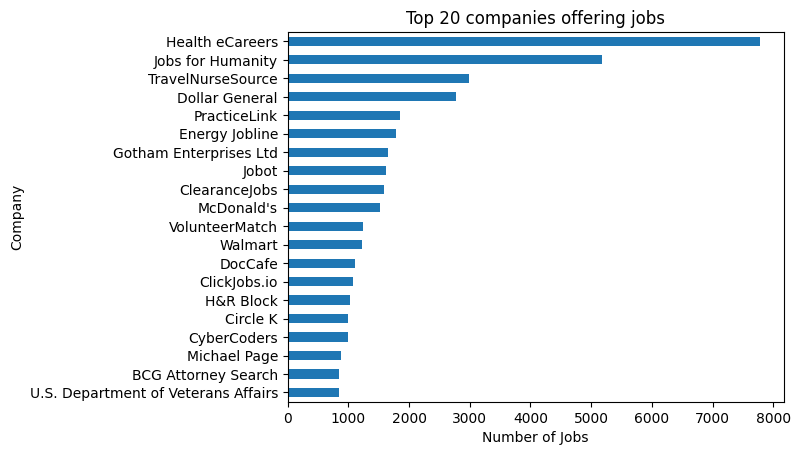

In [28]:
df['company'].value_counts()
df['company'].value_counts().head(20).sort_values().plot(
    kind='barh',
    xlabel='Number of Jobs',
    ylabel='Company',
    title='Top 20 companies offering jobs'
)

We can notice that 'Health eCareers' is the most offering jobs company with almost 8000 jobs.\
Also, there isn't that much of a difference between the 5th-20th companies.

### 3.1.2 Most searched cities
A horizontal bar chart is used to plot the top 10 searched cities when searching for jobs.

<Axes: title={'center': 'Top 10 searched cities'}, xlabel='Number of Searches', ylabel='City'>

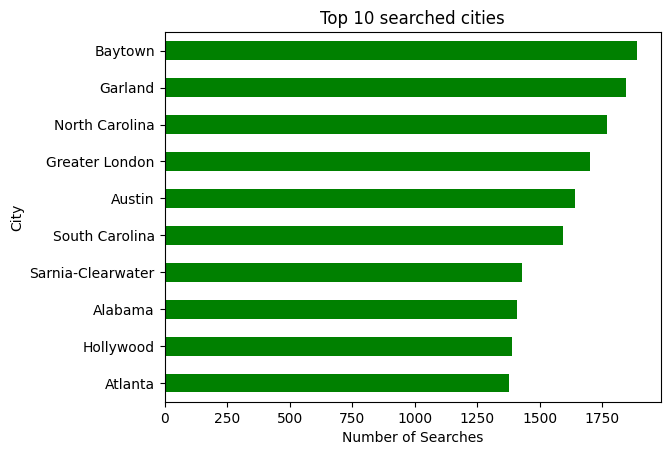

In [29]:
df['search_city'].value_counts()
df['search_city'].value_counts().head(10).sort_values().plot(
    kind='barh',
    xlabel='Number of Searches',
    ylabel='City',
    title='Top 10 searched cities',
    color='green',
    yticks=[tick for tick in range(200,2000,200)]
)

We can see that 'Baytown' is the most desired city for the job seekers and may indicate that it has higher salaries or better work environments than other cities.

### 3.1.3 Most open position searched
A horizontal bar chart is used to plot the top 10 position searched of jobs which are still open.

<Axes: xlabel='Number of Jobs', ylabel='Top available position searched'>

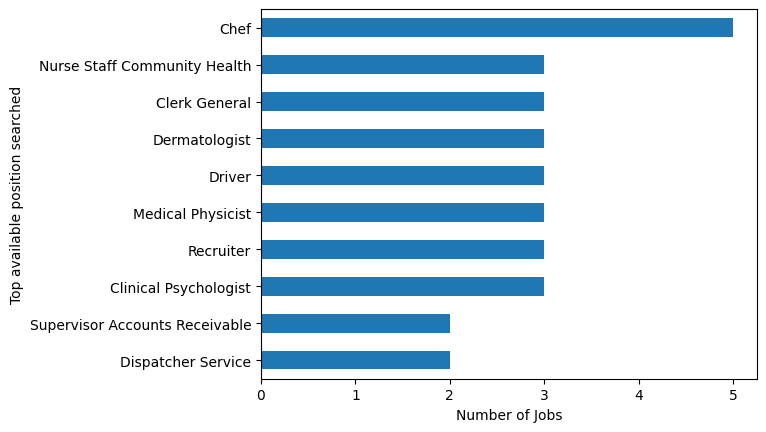

In [30]:
# df['is_being_worked'].value_counts()
# df.loc[df['is_being_worked']==True,'search_position'].value_counts().sum()
df.loc[df['is_being_worked']==True,'search_position'].value_counts().head(10).sort_values().plot(
    kind='barh',
    xlabel='Number of Jobs',
    ylabel='Top open position searched'
)

Based on the horizontal bar chart above, 'Chef' is the most open position searched.\
This might raise assumptions that this job is continiously changes its requirements but still gets the jobs seekers attention.

## 3.2 Bi-variate Analysis

### 3.2.1 Relationship between `job_level` and `job_type`
A heatmap is used to demonstrate the correlation between `job_level` and `job_type` in United States jobs.

<Axes: xlabel='job_type', ylabel='job_level'>

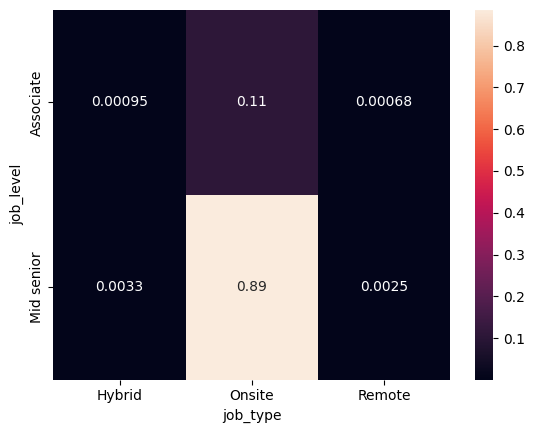

In [31]:
us_levels = df.loc[df['search_country']=='United States', 'job_level']
us_types = df.loc[df['search_country']=='United States', 'job_type']

cross = pd.crosstab(us_levels,us_types,normalize=True)
# cross = pd.crosstab(df['job_level'],df['job_type'],normalize=True)
cross

sns.heatmap(cross,annot=True)

Based on the heatmap above, Mid senior-Onsite jobs are highly correlated with each other.\
In other words, Mid seniors nearly always have Onsite jobs.

# 4 - Feature Engineering:
- Create new features that might be useful for analysis (e.g., average rating, occupancy rate, etc.).
- Encode categorical variables if necessary (e.g., one-hot encoding, label encoding, etc.).

## 4.1 - How often does a search match the job title ?
We can use a new boolean column `is_search_match` which will decide if the position searched by user matches the job title or not.

In [32]:
def is_match_func(row) :
    position_as_list = row['search_position'].split(' ')
    title = row['job_title']
    for word in position_as_list :
        if word in title :
            return True
    return False

df['is_match_search'] = df.apply(is_match_func,axis=1) # axis=1 means apply is_match_func function on each row

In [33]:
df.head()

,job_link,last_processed_time,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,is_match_search
0,https://www.linkedin.com/jobs/view/freshman-ba...,2024-01-21 02:28:28.626152+00:00,False,Freshman Basketball Coach,Bridgeport Public Schools,"Bridgeport, CT",2024-01-14,Stamford,United States,Head Coach,Mid senior,Onsite,True
1,https://www.linkedin.com/jobs/view/engineering...,2024-01-19 09:45:09.215838+00:00,False,ENGINEERING TECHNICIAN 4 - Construction,State of Nevada Division of Human Resource Man...,"Henderson, NV",2024-01-13,Las Vegas,United States,Documentation Engineer,Associate,Onsite,False
2,https://www.linkedin.com/jobs/view/monitoring-...,2024-01-19 09:45:09.215838+00:00,False,"Monitoring Systems Engineer, Senior with Secur...",ClearanceJobs,"San Diego, CA",2024-01-17,Chula Vista,United States,Tool Grinder Ii,Mid senior,Onsite,False
3,https://ca.linkedin.com/jobs/view/senior-instr...,2024-01-20 13:23:47.582763+00:00,False,"Senior Instrumentation & Controls Engineer, Water",Stantec,"Kelowna, British Columbia, Canada",2024-01-14,Kelowna,Canada,Controls Designer,Mid senior,Onsite,True
4,https://www.linkedin.com/jobs/view/academic-pr...,2024-01-19 12:29:39.707367+00:00,False,Academic Professional Track (Non-Tenure): Prof...,Texas A&M University,"College Station, TX",2024-01-14,College Park,United States,Educational Resource Coordinator,Mid senior,Onsite,True


is_match_search
False    152604
True      97394
Name: count, dtype: int64

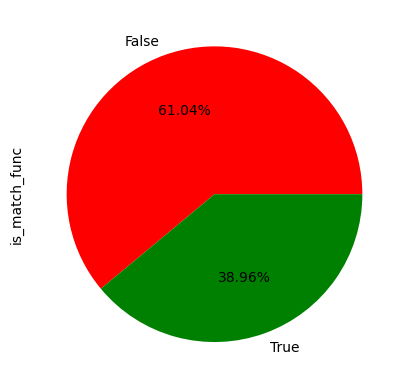

In [34]:
df['is_match_search'].value_counts().plot(
    kind='pie',
    ylabel='is_match_func',
    colors=['red','green'],
    autopct='%.2f%%'
)

df['is_match_search'].value_counts()

From the pie chart above, we can notice that most of the serached positions doesn't really match the posted job title.\
This can be helpful to linkedIn to enhance their user experience by being more accurate in viewing job results.

# 5 - Conclusion:
- Summarize the findings from the exploratory data analysis.
- Discuss any insights or patterns observed in the data.
- Make recommendations based on the analysis conducted.

In conclusion, we can summarize some insights from the dataset in the following points :
- 'Health eCareers' and 'Baytown' are the most offering jobs company and the most searched city respectively.
- New information can be extracted from data using univariate/bi-variate analysis.
- Categorical data could be difficult in handling missing (null) values.
- Plots can be plotted in many different ways using pandas library.

# Thank You !